# Desafio de Dados - Wellbe

## <font color='black'>Introdução</font>

Wellbe é uma plataforma empresarial de saúde e bem-estar que reduz custos de saúde para as empresas mensurando a efetividade de diversos benefícios e programas de saúde.

- Wellbe Analytics - Integra diversos dados de saúde e oferece indicadores em tempo real para auxiliar na Gestão de Saúde, Gestão de Risco e Mensuração de ROI sobre os programas de saúde próprios e de terceiros.

Para que o gestor consiga tomar uma boa decisão é necessário que os dados sejam extraídos, transformados e carregados para uma melhor visualização e entendimento, assim podendo tomar a melhor decisão.


## 2. Problema / Situação
Considerando que os custos de saúde têm aumentado muito e baixa qualidade de vida afetando a produtividade, as empresas buscam soluções de qualidade de vida que possam reduzir esses gastos em saúde (o plano de saúde é um benefício onde o reajuste anual é  baseado na utilização dos colaboradores). Com cada vez mais empresas usando a Wellbe é necessário garantir agilidade e acurácia no processo de população do banco de dados.

## 3. Desafio
Realizar uma implementação completa dos dados, desde extração, transformação e carregamento dos dados para a construção de um dashboard.

## 3. Ferramentas Utilizadas
-	MySQL
-	Python3
-	Jupyter Notebook
-	Bibliotecas: pandas, mysql.connector, numpy, seaborn, matplotlib.

## 4. Análise Exploratória

Como primeiro passo, foram importados os pacotes necessários e o dataset em formato csv:

In [ ]:
# Importando pacotes a serem utilizados
import pandas as pd
import mysql.connector
import numpy as np
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "whitegrid")

In [ ]:
# Importando o Dataset em csv
arquivo = pd.read_csv('Dados_Atestados_v1.csv')

Foi realizada a análise das primeiras linhas do conjunto de dados onde foi possível observar que o título das colunas apresentava-se na 12ª linha e, que de forma geral existiam muitos valores nulos:

In [ ]:
# Visualizando as primeiras entradas dos dados importados
arquivo.head(15)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Listagem de Atestados,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Empresa:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dessa forma, foi feita uma especificação do cabeçalho do arquivo e ignoradas as linhas anteriores:

In [ ]:
# Especificando o cabeçalho do arquivo e ignorando as linhas anteriores
arquivo = pd.read_csv('Dados_Atestados_v1.csv', header=13)
arquivo.head()

,Código,Custo do afastamento,Identificação,Funcionário,Cargo,Data do Atestado,Especialidade,Motivo,Líder
0,1036743,"20,4",NaN,Anonimo 1,ASSISTENTE DE IMPLANTACAO,29/05/2019,Exames,Exames,Sim
1,1036742,23,NaN,Anonimo 1,ASSISTENTE DE IMPLANTACAO,23/05/2019,Neurologia pediátrica,Acompanhamento familiar,NaN
2,1036741,"22,8",NaN,Anonimo 1,ASSISTENTE DE IMPLANTACAO,17/05/2019,NaN,Consulta médica,NaN
3,1036740,–-,NaN,Anonimo 1,ASSISTENTE DE IMPLANTACAO,16/05/2019,Exames,Exames,NaN
4,1036739,22,NaN,Anonimo 1,ASSISTENTE DE IMPLANTACAO,06/05/2019,NaN,Consulta médica,NaN


Para conhecer um pouco melhor os dados, foram observados os dados no próprio arquivo csv, foram visualizadas também as linhas finais do dataframe, quantidade e tipos de dados.

Com essa análise, o que se pode observar foi o seguinte:

1 - Já no arquivo csv pode-se notar que havia espaços antes e após os dados de algumas colunas;

2 - Conforme checado nas linhas finais, aparentemente existiam valores nulos por toda a extensão dos dados;

3 - Tratava-se de um conjunto de dados com 91 linhas e 9 colunas;

4 - Os tipos dos dados não estavam todos corretos.


In [ ]:
# Checando as dimensões do dataframe
arquivo.shape

(91, 9)

In [ ]:
# Visualizando as últimas entradas
arquivo.tail()

,Código,Custo do afastamento,Identificação,Funcionário,Cargo,Data do Atestado,Especialidade,Motivo,Líder
86,1037659,9524,NaN,Anonimo 21,ANALISTA SINISTROS I,04/06/2019,Oftalmologia,Acompanhamento familiar,Não
87,1027619,9524,NaN,Anonimo 21,ANALISTA SINISTROS I,13/03/2019,Pediatria,Acompanhamento familiar,NaN
88,1036380,NaN,NaN,Anonimo 22,AUDITOR II,31/05/2019,Cardiologista,Exames,Não
89,1032392,9916,NaN,Anonimo 22,ANALISTA ESTUDOS E COTACAO I,23/04/2019,Odontologia,Consulta odontológica,NaN
90,1027618,9916,NaN,Anonimo 22,ANALISTA ESTUDOS E COTACAO I,12/03/2019,Odontologia,Consulta odontológica,NaN


In [ ]:
# Verificando tipos de dados
arquivo.dtypes

Código                    int64
Custo do afastamento     object
Identificação           float64
Funcionário              object
Cargo                    object
Data do Atestado         object
Especialidade            object
Motivo                   object
Líder                    object
dtype: object

## 5. Tratamento dos Dados

5.1 Primeiramente foram feitas as alterações dos tipos de dados:

In [ ]:
# Alterando dados da coluna Custo do afastamento de str para float
arquivo['Custo do afastamento'] = arquivo['Custo do afastamento'].str.replace(',', '.')
arquivo['Custo do afastamento'] = pd.to_numeric(arquivo["Custo do afastamento"], errors="coerce")

In [ ]:
# Alterando dados da coluna Identificação de float para str
arquivo['Identificação'] = arquivo['Identificação'].astype(str)

In [ ]:
# Alterando dados da coluna Data do Atestado de str para data
arquivo['Data do Atestado'] = pd.to_datetime(arquivo['Data do Atestado'])

In [ ]:
# Visualizando tipos dos dados após tratamento
arquivo.dtypes

Código                           int64
Custo do afastamento           float64
Identificação                   object
Funcionário                     object
Cargo                           object
Data do Atestado        datetime64[ns]
Especialidade                   object
Motivo                          object
Líder                           object
dtype: object

5.2 Com relação aos dados nulos, os mesmos foram excluídos assim como, a coluna 'Líder' também foi removida, já que continha uma grande quantidade de valores ausentes e não seria utilizada diretamente para as perguntas de negócio desse caso em específico:

In [ ]:
# Visualizando valores nulos por coluna
arquivo.isnull().sum()

Código                   0
Custo do afastamento     2
Identificação            0
Funcionário              0
Cargo                    3
Data do Atestado         1
Especialidade           16
Motivo                   6
Líder                   69
dtype: int64

In [ ]:
# Excluindo a coluna 'Líder'
arquivo = arquivo.drop(columns=['Líder'])

In [ ]:
# Tratando valores nulos
arquivo = arquivo.dropna (how = 'any')
arquivo['especialidade'] = arquivo['especialidade'].fillna('não informado')
arquivo['custo'] = arquivo['custo'].fillna('0')
arquivo['cargo'] = arquivo['cargo'].fillna('não informado')
arquivo['lider'] = arquivo['lider'].fillna('não informado')
arquivo['motivo'] = arquivo['motivo'].fillna('não informado')
arquivo['identificacao'] = arquivo['identificacao'].fillna('não informado')

In [ ]:
# Visualizando valores nulos após tratamento
arquivo.isnull().sum()

Código                  0
Custo do afastamento    0
Identificação           0
Funcionário             0
Cargo                   0
Data do Atestado        0
Especialidade           0
Motivo                  0
dtype: int64

5.3 Foi feita também a remoção de espaços:

In [ ]:
# Tratando espaços
arquivo['Identificação'] = arquivo['Identificação'].str.strip()
arquivo['Funcionário'] = arquivo['Funcionário'].str.strip()
arquivo['Cargo'] = arquivo['Cargo'].str.strip()
arquivo['Especialidade'] = arquivo['Especialidade'].str.strip()
arquivo['Motivo'] = arquivo['Motivo'].str.strip()

In [ ]:
# Checando as novas dimensões do dataframe
arquivo.shape

(69, 8)

## 6. Salvando dados Tratados

Uma vez realizada a etapa de exploração e tratamento dos dados, os mesmos foram salvos para então dar início a inserção no MySQL:

In [ ]:
# Salvando dados tratados
arquivo.to_csv('Dados_Atestados_v2.csv')

## 7. Inserindo os dados no MySQL

Antes de criar uma tabela no MySQL, foi feita a importação do dataset com os dados tratados em formato csv:

In [ ]:
# Importando o Dataset em csv
dados = pd.read_csv('Dados_Atestados_v2.csv')

Com utilização do mysql.connector foi realizada uma conexão entre o Jupyter Notebook e o banco de dados 'registros' que já havia sido criado no MySQL.

Após isso, foi criada a tabela 'afastamentos', onde os dados do arquivo 'Dados_Atestados_v2.csv' foram inseridos:

In [ ]:
import mysql.connector as msql
from mysql.connector import Error
try:
    conn = msql.connect(host='127.0.0.1', database='registros', user='root', password='')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("Conectado ao Database:")
        cursor.execute('DROP TABLE IF EXISTS afastamentos;')
        print('Criando Tabela....')

        cursor.execute("CREATE TABLE afastamentos(id int PRIMARY KEY, codigo int,custo float,identificacao varchar(255),funcionario varchar(255),cargo varchar(255),data_do_afastamento datetime,especialidade varchar(255),motivo varchar(255))")
        print("Tabela Criada....")

        for i,row in dados.iterrows():
            sql = "INSERT INTO afastamentos VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s)"
            cursor.execute(sql, tuple(row))
        print("Registros inseridos.")
            # the connection is not auto committed by default, so we must commit to save our changes
        conn.commit()
except Error as e:
            print("Error while connecting to MySQL", e)

Conectado ao Database:
Criando Tabela....
Tabela Criada....
Registros inseridos.


Foi realizada uma consulta na tabela para certificar que os nossos dados inseridos foram guardados corretamente.

In [ ]:
# Executando query
sql = "SELECT * FROM afastamentos"
cursor.execute(sql)
# Fetch all the records
result = cursor.fetchall()
for i in result:
    print(i)

(0, 1036743, 20.4, None, 'Anonimo 1', 'ASSISTENTE DE IMPLANTACAO', datetime.datetime(2019, 5, 29, 0, 0), 'Exames', 'Exames')
(1, 1036742, 23.0, None, 'Anonimo 1', 'ASSISTENTE DE IMPLANTACAO', datetime.datetime(2019, 5, 23, 0, 0), 'Neurologia pediátrica', 'Acompanhamento familiar')
(5, 1033172, 205.0, None, 'Anonimo 1', 'ASSISTENTE DE IMPLANTACAO', datetime.datetime(2019, 4, 24, 0, 0), 'Pediatria', 'Acompanhamento familiar')
(6, 1032228, 123.0, None, 'Anonimo 1', 'ASSISTENTE DE IMPLANTACAO', datetime.datetime(2019, 4, 4, 0, 0), 'Neurologia pediátrica', 'Acompanhamento familiar')
(7, 1030902, 205.0, None, 'Anonimo 1', 'ASSISTENTE DE IMPLANTACAO', datetime.datetime(2019, 7, 3, 0, 0), 'Odontologia', 'Consulta odontológica')
(11, 1027641, 123.0, None, 'Anonimo 4', 'ANALISTA CONTROLE OPERACIONAL I', datetime.datetime(2019, 3, 13, 0, 0), 'Dermatologia', 'Consulta médica')
(12, 1036760, 9236.0, None, 'Anonimo 5', 'ASSISTENTE OPERACIONAL II', datetime.datetime(2019, 5, 16, 0, 0), 'Neurologia', 

## 8. Respondendo as Perguntas de Negócio

### 1. Qual departamento gastou mais em afastamentos?

#### Resposta:

Pôde-se observar, relacionando as informações de custo com os cargos onde houveram afastamentos, que o departamento contábil gastou mais em afastamentos:

In [ ]:
# Cria a consulta SQL
query1 = '''SELECT cargo, sum(custo) as custo FROM afastamentos where cargo != \'não informado\' group by cargo'''

In [ ]:
# Resultado
resposta1 = pd.read_sql_query(query1, conn)
resposta1 = resposta1.sort_values(by = 'custo', ascending = False)
resposta1['percentual'] = (resposta1['custo'] / resposta1['custo'].sum()) * 100

In [ ]:
# Visualizando o dataframe do resultado
display(resposta1)

,cargo,custo,percentual
0,ANALISTA CONTABIL II,73720.000000,16.323102
9,ASSISTENTE DE IMPLANTACAO,58296.400000,12.908004
8,ASSISTENTE CONTROLE OPERACIONAL,57770.000000,12.791449
2,ANALISTA ESTUDOS E COTACAO I,57264.000000,12.679410
3,ANALISTA ESTUDOS E COTACAO II,48390.000000,10.714527
17,TECNICO SEGUROS VG I,46805.000000,10.363575
6,ANALISTA RISCOS II,19518.000000,4.321681
7,ANALISTA SINISTROS I,19048.000000,4.217613
16,TECNICO SEGUROS IV,18750.000000,4.151630
13,TECNICO DE SEGUROS I,9966.000000,2.206674


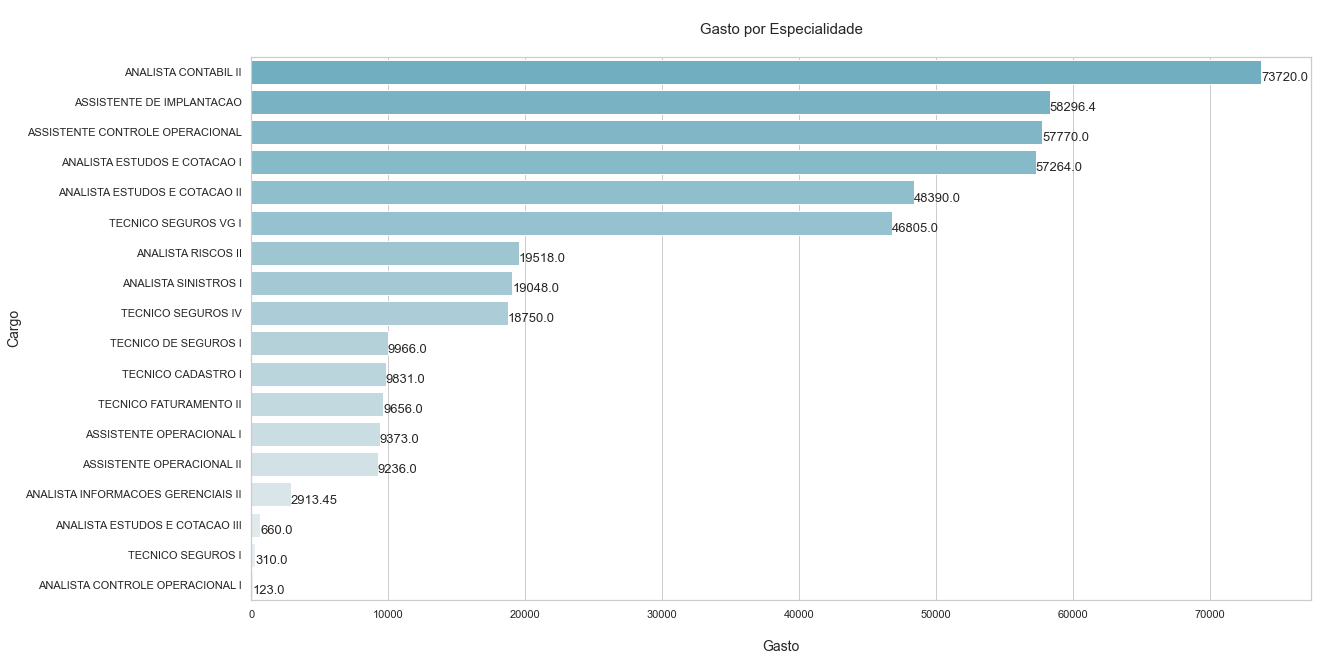

In [ ]:
# Visualizando o gráfico do resultado geral

plt.figure(figsize = (19,10))
g = sns.barplot(y = resposta1['cargo'], x = resposta1['custo'], orient = "h", palette='light:c_r')
for i in range(0,18):
    plt.text(resposta1['custo'][resposta1.index[i]]-1,
             i + 0.30,
             round(resposta1['custo'][resposta1.index[i]],2), fontsize = 13)

plt.ylabel('Cargo', fontsize = 14)
plt.xlabel('\nGasto', fontsize = 14)
plt.title('\nGasto por Especialidade\n', fontsize = 15)
plt.show()

In [ ]:
# Realizando cálculo da porcentagem dos resultados
others = {}
others['custo'] = resposta1[resposta1['percentual'] < 5]['custo'].sum()
others['percentual'] = resposta1[resposta1['percentual'] < 5]['percentual'].sum()
others['cargo'] = 'others'

resposta1 = resposta1[resposta1['percentual'] > 12.7]
resposta1 = resposta1.append(others, ignore_index = True)
resposta1 = resposta1.sort_values(by = 'custo', ascending = False)

labels = [str(resposta1['cargo'][i])+' '+'['+str(round(resposta1['percentual'][i],2)) +'%'+']' for i in resposta1.index]

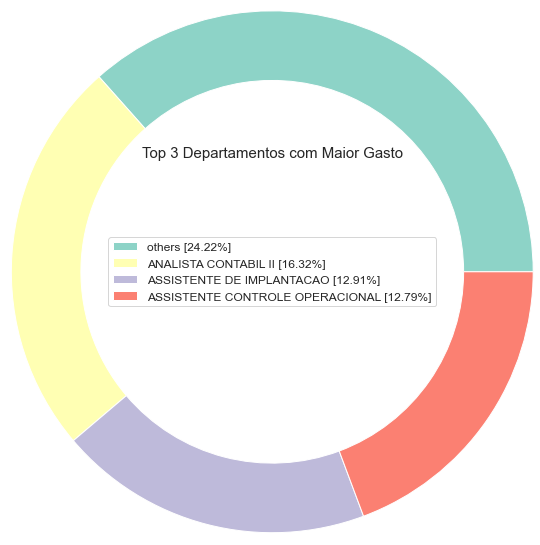

In [ ]:
# Visualizando o gráfico do resultado do Top 3 em gasto
cs = cm.Set3(np.arange(100))
plt.figure(figsize = (8,4))
plt.pie(resposta1['custo'], labeldistance = 1, radius = 3, colors = cs, wedgeprops = dict(width = 0.8))
plt.legend(labels = labels, loc = 'center', prop = {'size':12})
plt.title("Top 3 Departamentos com Maior Gasto", loc = 'Center', fontdict = {'fontsize':15,'fontweight':20})
plt.show()

### 2. Qual especialidade teve o maior gasto?

#### Resposta:

Quando feita uma correlação entre as informações de custo com as especialidades, observou-se que especialidade Odontologia teve o maior gasto:

In [ ]:
# Cria a consulta SQL
query2 = '''SELECT especialidade, sum(custo) as custo FROM afastamentos  where especialidade != \'não informado\' group by especialidade'''

In [ ]:
# Resultado
resposta2 = pd.read_sql_query(query2, conn)
resposta2 = resposta2.sort_values(by = 'custo', ascending = False)
resposta2['percentual'] = (resposta2['custo'] / resposta2['custo'].sum()) * 100

In [ ]:
# Visualizando o dataframe do resultado
display(resposta2)

,especialidade,custo,percentual
12,Odontologia,116072.000000,25.700693
4,Exames,38012.400000,8.416716
7,Ginecologia/Obstetricia,37466.000000,8.295732
16,Outras,28852.450012,6.388517
17,Pediatria,28760.000000,6.368047
15,Otorrinolaringologia,28730.000000,6.361404
6,Gastroenterologia,28092.000000,6.220138
11,Obstetricia,27645.000000,6.121163
14,Ortopedia,20138.000000,4.458961
18,Radiologia,19356.000000,4.285811


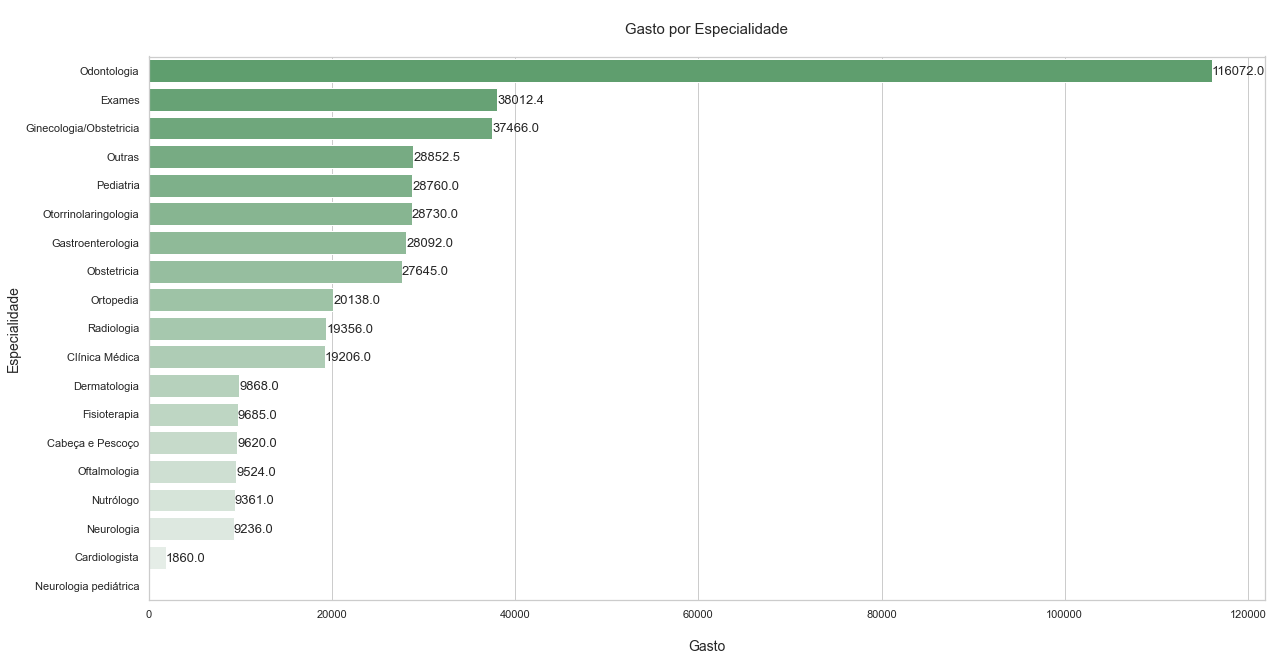

In [ ]:
# Visualizando o gráfico do resultado geral
plt.figure(figsize = (20,10))
g = sns.barplot(y = resposta2['especialidade'], x = resposta2['custo'], orient = "h", palette='light:g_r')
for i in range(0,18):
    plt.text(resposta2['custo'][resposta2.index[i]]-1,
             i + 0.15,
             round(resposta2['custo'][resposta2.index[i]],1), fontsize = 13)

plt.ylabel('Especialidade',fontsize = 14)
plt.xlabel('\nGasto', fontsize = 14)
plt.title('\nGasto por Especialidade\n', fontsize = 15)
plt.show()

In [ ]:
# Realizando cálculo da porcentagem dos resultados
others = {}
others['custo'] = resposta2[resposta2['percentual'] < 5]['custo'].sum()
others['percentual'] = resposta2[resposta2['percentual'] < 5]['percentual'].sum()
others['especialidade'] = 'others'

resposta2 = resposta2[resposta2['percentual'] > 8]
resposta2 = resposta2.append(others, ignore_index = True)
resposta2 = resposta2.sort_values(by = 'custo', ascending = False)

labels = [str(resposta2['especialidade'][i])+' '+'['+str(round(resposta2['percentual'][i],2)) +'%'+']' for i in resposta2.index]

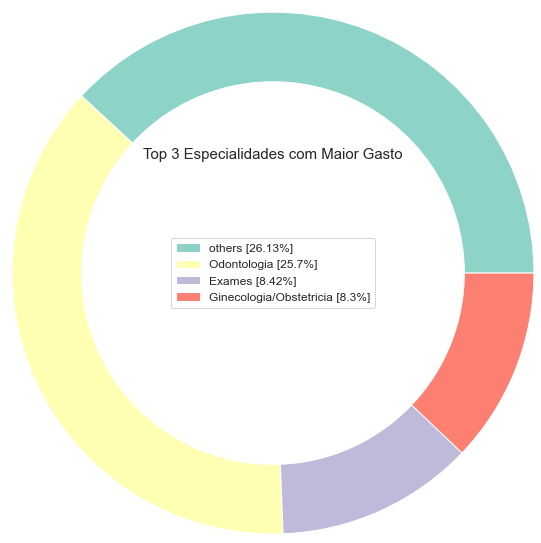

In [ ]:
# Plot
cs = cm.Set3(np.arange(100))
plt.figure(figsize = (8,4))
plt.pie(resposta2['custo'], labeldistance = 1, radius = 3, colors = cs, wedgeprops = dict(width = 0.8))
plt.legend(labels = labels, loc = 'center', prop = {'size':12})
plt.title("Top 3 Especialidades com Maior Gasto", loc = 'Center', fontdict = {'fontsize':15,'fontweight':20})
plt.show()

### 3. Qual foi o principal motivo de afastamento?

#### Resposta:

Analisando os motivos de afastamento, Consulta médica mostrou-se como o principal motivo de afastamento.

In [ ]:
# Criando a consulta SQL
query3 = '''SELECT motivo, COUNT(*) AS count FROM afastamentos where motivo != \'não informado\' GROUP BY motivo'''

In [ ]:
# Extraindo o resultado
resposta3 = pd.read_sql_query(query3, conn)
resposta3 = resposta3.sort_values(by = 'count', ascending = False)
resposta3['percentual'] = (resposta3['count'] / resposta3['count'].sum()) * 100

In [ ]:
# Visualizando o dataframe do resultado
display(resposta3)

,motivo,count,percentual
4,Consulta médica,24,34.782609
8,Exames,15,21.739130
5,Consulta odontológica,10,14.492754
1,Acompanhamento familiar,7,10.144928
6,Dor/Doença,6,8.695652
3,Cirurgia Odontológica,2,2.898551
0,Acidente,1,1.449275
2,Cirurgia,1,1.449275
7,Exame periódico,1,1.449275
9,SUS - Pronto Socorro,1,1.449275


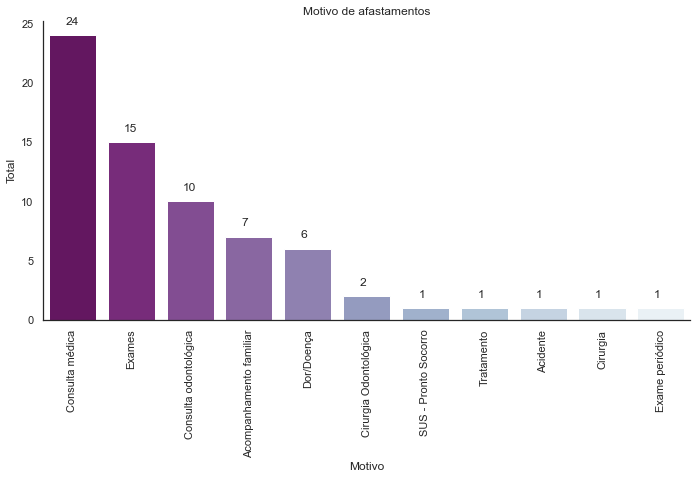

In [ ]:
# Visualizando o gráfico do resultado

sns.set_style("white")
motivo_order = dados['Motivo'].value_counts().index
g = sns.catplot(x="Motivo", data=dados, kind="count", palette="BuPu_r", height=5, aspect=2, order=motivo_order)
g.ax.xaxis.set_label_text("Motivo")
g.ax.yaxis.set_label_text("Total")
g.ax.set_title("Motivo de afastamentos")
plt.xticks(rotation=90)

for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()+0.28, p.get_height()+0.90))

In [ ]:
# Fechando a conexão MySQL
conn.close()